In [1]:
import import_ipynb  #pip install import_ipynb
from Functions import *
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

importing Jupyter notebook from Functions.ipynb


#### Owner -> Alexei Alves de Souza 
#### Matrícula -> 398611

#### Introdução :                                                                                                                                                                                                       
#### Nesse Trabalho será realizada a análise de um Perceptron Simples , o qual será utilizado para prever resultados em funções lineares e não lineares, bem como no Dataset HearthstoneMetaGenerator apresentado no Trabalho anterior.
#### Também será abordado o Método da Validação Cruzada, utilizado principalmente em datasets menos complexos para uma validação mais efetiva do modelo.

#### O classificador perceptron utilizado será o apresentado na descrição da disciplina abordado no livro Python Machine Learning de Sebastian Raschka e Vahid Mirjalili

In [2]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Questão 1: Função para calcula a acurácia do modelo


In [3]:
def model_score(X_test,y_test,perceptron):
    y_test = np.array(y_test)
    y_predict = perceptron.predict(X_test)
    total_lb = len(y_test)
    
    equal_lb, = np.where(y_test==y_predict)
    equal_lb = len(equal_lb)
    score = equal_lb/total_lb
    return score

### Questão 2: Método de Validação Cruzada
#### Esse método é baseado em dividir o dataset em blocos de treino e teste e a cada iteração variar o bloco de teste sendo os demais de treinamento para assim reduzir resultados tendenciosos
#### MVC(X,y,n_div):
##### X -> Conjunto contendo os atributos
##### y -> Conjunto contendo os labels
##### n_div -> número de divisões ou iterações para o MVC , caso a divisão  do tamanho do vetor de dados pelo n_div possuir resto maior que zero serão acrescentados valores aleatórios pertencentes ao dataset.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
def MVC (X,y,n_div):
    resto = len(X)%n_div
    Xdata = X.copy()
    ydata = y.copy()
    mat_score = np.empty(0)
    #Acrescenta valores aleátorios pertencentes ao dataset para que a divisão seja exata
    if resto !=  0 :
        div = len(Xdata)//n_div
        size = (div+1)*n_div - len(Xdata)
        rand_idxs = np.random.randint(len(Xdata), size = size)
        for i in range (size):
            Xdata = np.vstack((Xdata,X[rand_idxs[i]]))
            ydata = np.append(ydata,y[rand_idxs[i]])   
    #Faz o MCV para o número de divisões utilizado
    st = 0
    end = len(Xdata)
    st_test = 0
    end_test = 0
    for i in range (n_div):
        st_test = end_test
        end_test = int((end/n_div)*(i+1))

        Xtrain = np.concatenate((Xdata[st:st_test],Xdata[end_test:end]))
        Xtest = Xdata[st_test:end_test]
    
        ytrain = np.concatenate((ydata[st:st_test],ydata[end_test:end]))
        ytest = ydata[st_test:end_test]
        
        #Realiza o treino e a validação
        perceptron = Perceptron(eta=0.1, n_iter=100)
        perceptron.fit(Xtrain,ytrain)
        
        score = model_score(Xtest,ytest,perceptron)
        mat_score = np.append(mat_score,score)
        
        print('{}: score = {}'.format(i,score))
    return mat_score
        

### Questão 3: Teste do Classificador Perceptron

#### Linear:
##### Neste exemplo será utilizada a função make_blobs da lib sklearn a qual gera pontos em distribuição gaussiano ideal para representações lineares

In [6]:
from sklearn.datasets import make_blobs,make_circles

In [7]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2)
y[y == 0] = -1

df = pd.DataFrame(dict(x = X[:,0],y = X[:,1],label = y))
df.head(10)

,x,y,label
0,8.191323,8.323980,-1
1,11.185991,4.756871,1
2,8.605840,7.444967,1
3,7.079887,8.498500,-1
4,8.467341,4.483462,1
5,10.639910,4.216905,1
6,6.189761,9.080840,-1
7,8.049700,8.395257,-1
8,7.498001,7.776077,-1
9,5.811494,9.945966,-1


In [8]:
inMeta = np.where(y==1)
outMeta = np.where(y==-1)

Xin = X[inMeta]
Xout = X[outMeta]

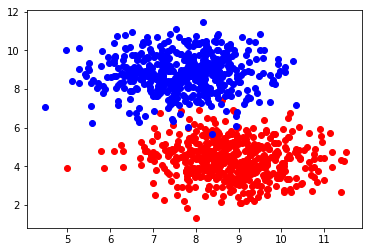

In [9]:
plt.scatter(Xin[:,0],Xin[:,1],color = 'red', marker = 'o')
plt.scatter(Xout[:,0],Xout[:,1],color = 'blue', marker = 'o')

In [10]:
accuracy = MVC(X,y,7)
print('acuracia:' ,accuracy.sum()/len(accuracy))

0: score = 0.9790209790209791
1: score = 0.972027972027972
2: score = 0.993006993006993
3: score = 0.972027972027972
4: score = 0.986013986013986
5: score = 0.9790209790209791
6: score = 0.9370629370629371
acuracia: 0.974025974025974


#### Conclusão:
##### É possível observar que em uma distribuição gaussiana com regiões bem definidas de cada classe foi possível obter uma precisão de quase 100% o que era esperado devido as áreas tão bem delimitadas.

#### Não linear

##### Nessa análise será utilizado um dataset não linear gerado pela lib sklearn, no caso uma distribuição circular de pontos

In [11]:
X,y = make_circles(n_samples=100)
y[y == 0] = -1

df = pd.DataFrame(dict(x = X[:,0],y = X[:,1],label = y))
df.head(10)

,x,y,label
0,-0.425779,-9.048271e-01,-1
1,-1.000000,-3.216245e-16,-1
2,0.800000,0.000000e+00,1
3,-0.309017,-9.510565e-01,-1
4,-0.743821,-2.944996e-01,1
5,0.743821,2.944996e-01,1
6,0.425779,9.048271e-01,-1
7,-0.050232,7.984214e-01,1
8,0.149905,-7.858298e-01,1
9,0.728969,-6.845471e-01,-1


In [12]:
inMeta = np.where(y==1)
outMeta = np.where(y==-1)

Xin = X[inMeta]
Xout = X[outMeta]

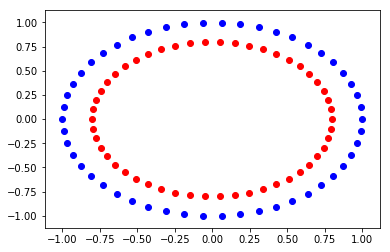

In [13]:
plt.scatter(Xin[:,0],Xin[:,1],color = 'red', marker = 'o')
plt.scatter(Xout[:,0],Xout[:,1],color = 'blue', marker = 'o')

In [14]:
accuracy = MVC(X,y,7)
print('acuracia:' ,accuracy.sum()/len(accuracy))

0: score = 0.3333333333333333
1: score = 0.5333333333333333
2: score = 0.5333333333333333
3: score = 0.4
4: score = 0.4666666666666667
5: score = 0.4
6: score = 0.5333333333333333
acuracia: 0.45714285714285713


#### Conclusão:

##### Em contraste com a região linear a acurácia de uma função não linear quando submetida à um perceptron é bem inferior e em muitos casos inferior a 50% , no qual uma análise aleátoria para duas classes poderia ser até mesmo mais adequada.

### Questão 4: Treinamento de um classificador perceptron no dataset do Hearthstone 
##### O objeto dessa análise é a partir das 2 variáveis winrate e número de partidas jogadas conseguir responder se o respectivo arquétipo pertence ou não ao META atual


#### Definições :
##### Hearthstone -> É um jogo de cartas online o qual possui 10 personagens com diferentes habilidade e cartas a eles atribuídas
##### Arquétipos de decks -> Apesar de o jogo possuir 10 personagens os tipos de decks não são atribuídos a eles e sim a arquétipos. Arquétipos são atribuições dadas aos decks baseadas em uma ou mais cartas que este contém que o definem ou de uma jogabilidade predominante:
##### ex: Deck Tempo -> Busca manter uma partida parelha para obter vantagem em algum momento com alguma combinação
#####       Deck Galakrond -> Deck baseado em completar a missão atribuída por conter a carta Galakrond
##### META : Conjunto de Decks que devido a serem frequentemente utilizados em determinado período recebem um 'nome' para caracteriza-los.

In [15]:
#O dataset é obtido pela função DATASET a qual é construída a partir das análises do trabalho1 anterior e esta localizada 
#no arquivo Functions.ipynb

#Obtém o dataset em que 1 pertence ao meta e -1 não
patch = './data.log'
data = DATASET(patch)
data.head(10)

,winrate,partidas,meta
Big Druid,50.661122,43516.0,-1.0
Big Spell Mage,51.337626,7931.0,-1.0
Bomb Warrior,48.116848,25562.0,-1.0
Bruxo Murloc,45.553109,2454.0,-1.0
Caçador Dragão,54.380436,76701.0,1.0
Control Demon Hunter,44.436723,16964.0,-1.0
Cube Priest,46.027912,17422.0,-1.0
Dragon Druid,50.206510,66853.0,1.0
Druida Malygos,46.394315,8082.0,-1.0
Druida Missão,42.125080,11132.0,-1.0


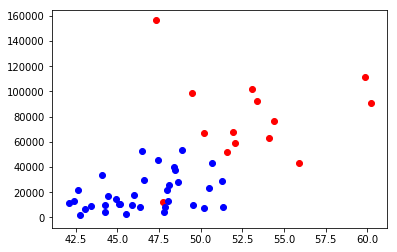

In [16]:
#Labels e Atributos
y = data.iloc[:,2].values
X = data.iloc[:,[0,1]].values

#Plot do gráfico da distribuição
inMeta = np.where(y==1)
outMeta = np.where(y==-1)

Xin = X[inMeta]
Xout = X[outMeta]

#Vermelho -> Pertence ao Meta; Azul -> Não pertence ao Meta
plt.scatter(Xin[:,0],Xin[:,1],color = 'red', marker = 'o')
plt.scatter(Xout[:,0],Xout[:,1],color = 'blue', marker = 'o')

#### Analisando a acurácia para os dados winrate e número de partidas como atributos:

In [17]:
accuracy = MVC(X,y,7)
print('acuracia:' ,accuracy.sum()/len(accuracy))

0: score = 0.14285714285714285
1: score = 0.2857142857142857
2: score = 0.5714285714285714
3: score = 0.14285714285714285
4: score = 0.42857142857142855
5: score = 0.14285714285714285
6: score = 0.7142857142857143
acuracia: 0.3469387755102041


#### É possível notar nessa análise uma alta imprecisão na predição dos valores bem como uma grande variação quando abordados diferentes conjuntos de teste e de treinamento.
#### O motivo disso se deve principalmente aos valores de partidas os quais possuem uma variância muito grande o que é refletido no resultado obtido.

#### Para reduzir o erro e garantir uma predição mais adequada será realizada uma reatribução dos valores das partidas em níveis de 1 a 10 de para assim reduzir a variância entre os valores e ser possível inferir um resultado minimamente satisfatório .

In [19]:
partidas = data['partidas'].values
partidas_new = np.zeros_like(partidas)
for i in range(len(partidas)):
    num = partidas[i]
    if num <= 10e3:
        num = 1
    elif num >= 10e4:
        num = 10
    else :
        num = round(num/10e3)
        
    partidas_new[i] = num
data_new = data.copy()
data_new['partidas'] = partidas_new

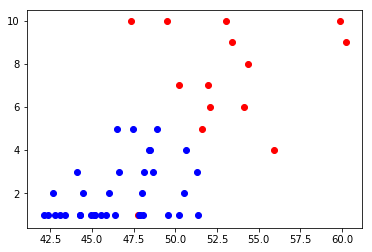

In [20]:
y = data_new.iloc[:,2].values
X = data_new.iloc[:,[0,1]].values

inMeta = np.where(y==1)
outMeta = np.where(y==-1)

Xin = X[inMeta]
Xout = X[outMeta]

#Vermelho -> Pertence ao Meta; Azul -> Não pertence ao Meta
plt.scatter(Xin[:,0],Xin[:,1],color = 'red', marker = 'o')
plt.scatter(Xout[:,0],Xout[:,1],color = 'blue', marker = 'o')

#### Acurácia para o dataset normalizado

In [21]:
accuracy = MVC(X,y,5)
print('acuracia:' ,accuracy.sum()/len(accuracy))

0: score = 0.8
1: score = 0.8
2: score = 0.9
3: score = 1.0
4: score = 0.9
acuracia: 0.8800000000000001


#### Treinamento e predição para valores empiricamente atribuídos

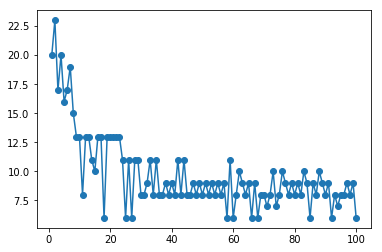

In [23]:
percep = Perceptron(eta=0.1, n_iter=100)
percep.fit(X,y)
### Gráfico com os updates(erros) em relação ao número de épocas
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_,marker = 'o')

#### Serão criados 3 arquétipos cujos winrates e código do número de partidas serão : [40,1],[50,8],[50,1] ; ou seja empiricamente podemos deduzir que um deck com winrate menor que 50% e número de partidas igual ou inferior a 10 mil certamente não pertencerá ao meta, e que um com alta winrate e muitas partidas certamente pertencerá. Já no terceiro caso vemos que possuir um número extremamente baixo também impossibilita o pertencimento ao meta.
#### y esperado = [ -1 1 -1]

In [24]:
newClasses = np.array([[40,1],[50,8],[50,1]])
print('Predição',percep.predict(newClasses));

Predição [-1  1 -1]


#### Conclusão :
##### Enfim utilizar um perceptron simples para predição do meta no hearthstone realizadas as devidas preparações dos dados pode de fato alcançar uma precisão satisfatória para os valores em geral em que de fato é observado uma certa divisão regional entre decks que pertencem ao META e os que não.
